In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-3-2025-kaggle-assignment-2/sample_submission.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-2/train.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-2/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPClassifier

In [3]:
train=pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-2/train.csv")
test=pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-2/test.csv")
test.isnull().sum()

id              0
adults          0
children        0
weekends        0
weekdays        0
meal_type       0
room_type    1660
arrival         0
lead_time     412
segment         0
repeat          0
price         406
requests        0
dtype: int64

# Identifying Datatypes of Columns

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29500 non-null  int64  
 1   adults          29500 non-null  int64  
 2   children        29500 non-null  int64  
 3   weekends        29500 non-null  int64  
 4   weekdays        29500 non-null  int64  
 5   meal_type       29500 non-null  object 
 6   room_type       28659 non-null  object 
 7   arrival         29500 non-null  object 
 8   lead_time       27805 non-null  float64
 9   segment         29500 non-null  object 
 10  repeat          29500 non-null  int64  
 11  price           27917 non-null  float64
 12  requests        29500 non-null  int64  
 13  booking_status  29500 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 3.2+ MB


# Descriptive Statistics Of Numerical Columns

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,29500.0,14749.500000,8516.060807,0.0,7374.75,14749.50,22124.25,29499.0
adults,29500.0,1.843559,0.518711,0.0,2.00,2.00,2.00,4.0
children,29500.0,0.106576,0.405517,0.0,0.00,0.00,0.00,10.0
weekends,29500.0,0.808136,0.868835,0.0,0.00,1.00,2.00,6.0
weekdays,29500.0,2.202237,1.404200,0.0,1.00,2.00,3.00,17.0
lead_time,27805.0,85.405431,85.939750,0.0,17.00,58.00,127.00,443.0
repeat,29500.0,0.026000,0.159138,0.0,0.00,0.00,0.00,1.0
price,27917.0,103.483304,35.120922,0.0,80.50,99.88,120.18,375.5
requests,29500.0,0.619661,0.785919,0.0,0.00,0.00,1.00,5.0
booking_status,29500.0,0.326441,0.468919,0.0,0.00,0.00,1.00,1.0


# Identifying And Handling The Missing Values

In [6]:
print(train.isnull().sum())

id                   0
adults               0
children             0
weekends             0
weekdays             0
meal_type            0
room_type          841
arrival              0
lead_time         1695
segment              0
repeat               0
price             1583
requests             0
booking_status       0
dtype: int64


In [7]:
print(test.isnull().sum())

id              0
adults          0
children        0
weekends        0
weekdays        0
meal_type       0
room_type    1660
arrival         0
lead_time     412
segment         0
repeat          0
price         406
requests        0
dtype: int64


In [8]:
from sklearn.impute import KNNImputer

# Use KNNImputer for better missing value handling
knn_imputer = KNNImputer(n_neighbors=5)
cat_imputer = SimpleImputer(strategy="most_frequent")

# Impute numeric columns with KNN
numeric_cols_to_impute = ["lead_time", "price"]
train[numeric_cols_to_impute] = knn_imputer.fit_transform(train[numeric_cols_to_impute])

# Impute categorical columns
train[["room_type"]] = cat_imputer.fit_transform(train[["room_type"]])
train.isnull().sum()

id                0
adults            0
children          0
weekends          0
weekdays          0
meal_type         0
room_type         0
arrival           0
lead_time         0
segment           0
repeat            0
price             0
requests          0
booking_status    0
dtype: int64

In [9]:
#Imputing the missing values for test data

test[["lead_time", "price"]] = knn_imputer.transform(test[["lead_time", "price"]])
test[["room_type"]] = cat_imputer.transform(test[["room_type"]])
test.isnull().sum()

id           0
adults       0
children     0
weekends     0
weekdays     0
meal_type    0
room_type    0
arrival      0
lead_time    0
segment      0
repeat       0
price        0
requests     0
dtype: int64

# Identifying And Handling Duplicates

In [10]:
print("=== DUPLICATE DETECTION - TRAIN DATA ===")
print(f"Total rows: {len(train)}\n")

# 1. Check exact full row duplicates
full_duplicates = train.duplicated().sum()
print(f"1. Exact full row duplicates: {full_duplicates}")
if full_duplicates > 0:
    print(f"   ({(full_duplicates/len(train)*100):.2f}% of data)")

# 2. Check ID-based duplicates (ID should be unique)
if 'id' in train.columns:
    id_duplicates = train['id'].duplicated().sum()
    print(f"2. Duplicate IDs: {id_duplicates}")
    if id_duplicates > 0:
        print(f"   Warning: IDs should be unique!")
        duplicate_ids = train[train['id'].duplicated(keep=False)]['id'].unique()
        print(f"   Duplicate ID values: {duplicate_ids[:10]}...")  # Show first 10
else:
    print(f"2. No 'id' column found")

# 3. Check feature-based duplicates (excluding id and target)
feature_cols = [col for col in train.columns if col not in ['id', 'booking_status']]
feature_duplicates = train.duplicated(subset=feature_cols).sum()
print(f"3. Duplicate feature combinations (excluding id/target): {feature_duplicates}")
if feature_duplicates > 0:
    print(f"   ({(feature_duplicates/len(train)*100):.2f}% of data)")
    print(f"   Note: Same features but different outcomes - keep for model diversity")

print(f"\n✓ Duplicate analysis complete for train data")

=== DUPLICATE DETECTION - TRAIN DATA ===
Total rows: 29500

1. Exact full row duplicates: 0
2. Duplicate IDs: 0
3. Duplicate feature combinations (excluding id/target): 7285
   (24.69% of data)
   Note: Same features but different outcomes - keep for model diversity

✓ Duplicate analysis complete for train data


In [11]:
print("\n=== DUPLICATE DETECTION - TEST DATA ===")
print(f"Total rows: {len(test)}\n")

# 1. Check exact full row duplicates
full_duplicates_test = test.duplicated().sum()
print(f"1. Exact full row duplicates: {full_duplicates_test}")
if full_duplicates_test > 0:
    print(f"   ({(full_duplicates_test/len(test)*100):.2f}% of data)")

# 2. Check ID-based duplicates
if 'id' in test.columns:
    id_duplicates_test = test['id'].duplicated().sum()
    print(f"2. Duplicate IDs: {id_duplicates_test}")
    if id_duplicates_test > 0:
        print(f"   Warning: IDs should be unique!")
        duplicate_ids_test = test[test['id'].duplicated(keep=False)]['id'].unique()
        print(f"   Duplicate ID values: {duplicate_ids_test[:10]}...")  # Show first 10
else:
    print(f"2. No 'id' column found")

# 3. Check feature-based duplicates (excluding id)
feature_cols_test = [col for col in test.columns if col != 'id']
feature_duplicates_test = test.duplicated(subset=feature_cols_test).sum()
print(f"3. Duplicate feature combinations (excluding id): {feature_duplicates_test}")
if feature_duplicates_test > 0:
    print(f"   ({(feature_duplicates_test/len(test)*100):.2f}% of data)")

print(f"\n✓ Duplicate analysis complete for test data")


=== DUPLICATE DETECTION - TEST DATA ===
Total rows: 7000

1. Exact full row duplicates: 0
2. Duplicate IDs: 0
3. Duplicate feature combinations (excluding id): 986
   (14.09% of data)

✓ Duplicate analysis complete for test data


# Identifying And Handling Outliers

In [12]:
# Advanced Outlier Detection with Isolation Forest
from sklearn.ensemble import IsolationForest

# Identify numeric columns for outlier detection
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'booking_status' in numeric_cols:
    numeric_cols.remove('booking_status')

print("=== UNIVARIATE OUTLIER DETECTION (IQR METHOD) ===\n")
outlier_summary = {}

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(train)) * 100
    
    if outlier_count > 0:
        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        print(f"{col}:")
        print(f"  Outliers: {outlier_count} ({outlier_pct:.2f}%)")
        print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Cancellation rate in outliers: {outliers['booking_status'].mean()*100:.2f}%")
        print(f"  Overall cancellation rate: {train['booking_status'].mean()*100:.2f}%\n")

# Multivariate Outlier Detection and Removal using Isolation Forest
print("\n=== MULTIVARIATE OUTLIER DETECTION & REMOVAL (ISOLATION FOREST) ===\n")
train_numeric = train[numeric_cols].copy()
train_numeric_filled = train_numeric.fillna(train_numeric.median())

iso_forest = IsolationForest(contamination=0.02, random_state=42, n_jobs=-1)
outlier_labels = iso_forest.fit_predict(train_numeric_filled)

multivariate_outliers = outlier_labels == -1
mv_outlier_count = multivariate_outliers.sum()
mv_outlier_pct = (mv_outlier_count / len(train)) * 100

print(f"Multivariate outliers detected: {mv_outlier_count} ({mv_outlier_pct:.2f}%)")
print(f"Cancellation rate in multivariate outliers: {train[multivariate_outliers]['booking_status'].mean()*100:.2f}%")
print(f"Cancellation rate in normal observations: {train[~multivariate_outliers]['booking_status'].mean()*100:.2f}%")

# Remove outliers for cleaner data
train_before = len(train)
train = train[~multivariate_outliers].reset_index(drop=True)
train_after = len(train)

print("\n=== OUTLIER HANDLING DECISION ===")
print(f"Strategy: REMOVE EXTREME OUTLIERS")
print(f"Removed: {train_before - train_after} rows ({((train_before - train_after)/train_before)*100:.2f}%)")
print(f"Remaining training data: {train_after} rows")
print("Rationale: Removing extreme outliers improves model generalization and accuracy.")

=== UNIVARIATE OUTLIER DETECTION (IQR METHOD) ===

adults:
  Outliers: 8263 (28.01%)
  Bounds: [2.00, 2.00]
  Cancellation rate in outliers: 26.95%
  Overall cancellation rate: 32.64%

children:
  Outliers: 2227 (7.55%)
  Bounds: [0.00, 0.00]
  Cancellation rate in outliers: 36.46%
  Overall cancellation rate: 32.64%

weekends:
  Outliers: 14 (0.05%)
  Bounds: [-3.00, 5.00]
  Cancellation rate in outliers: 71.43%
  Overall cancellation rate: 32.64%

weekdays:
  Outliers: 252 (0.85%)
  Bounds: [-2.00, 6.00]
  Cancellation rate in outliers: 60.71%
  Overall cancellation rate: 32.64%

lead_time:
  Outliers: 1088 (3.69%)
  Bounds: [-141.00, 283.00]
  Cancellation rate in outliers: 78.95%
  Overall cancellation rate: 32.64%

repeat:
  Outliers: 767 (2.60%)
  Bounds: [0.00, 0.00]
  Cancellation rate in outliers: 1.56%
  Overall cancellation rate: 32.64%

price:
  Outliers: 1352 (4.58%)
  Bounds: [21.88, 178.88]
  Cancellation rate in outliers: 25.15%
  Overall cancellation rate: 32.64%

requ

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Multivariate outliers detected: 590 (2.00%)
Cancellation rate in multivariate outliers: 17.63%
Cancellation rate in normal observations: 32.95%

=== OUTLIER HANDLING DECISION ===
Strategy: REMOVE EXTREME OUTLIERS
Removed: 590 rows (2.00%)
Remaining training data: 28910 rows
Rationale: Removing extreme outliers improves model generalization and accuracy.


# Feature Engineering

In [13]:
# Strong Feature Engineering to boost accuracy above 0.88

# (A) Total Nights - how long the booking is for
train['total_nights'] = train['weekends'] + train['weekdays']
test['total_nights'] = test['weekends'] + test['weekdays']

# (B) Price per night - normalized pricing metric
train['price_per_night'] = train['price'] / train['total_nights'].replace(0, 1)
test['price_per_night'] = test['price'] / test['total_nights'].replace(0, 1)

# (C) People - total guests in booking
train['people'] = train['adults'] + train['children']
test['people'] = test['adults'] + test['children']

# (D) People per night - booking density metric
train['people_per_night'] = train['people'] / train['total_nights'].replace(0, 1)
test['people_per_night'] = test['people'] / test['total_nights'].replace(0, 1)

# (E) Lead time categories - booking urgency
train['lead_time_category'] = pd.cut(train['lead_time'], 
                                      bins=[0, 30, 90, 180, 365, 1000], 
                                      labels=['last_minute', 'short', 'medium', 'long', 'very_long'])
test['lead_time_category'] = pd.cut(test['lead_time'], 
                                     bins=[0, 30, 90, 180, 365, 1000], 
                                     labels=['last_minute', 'short', 'medium', 'long', 'very_long'])

# (F) Price category - price positioning
train['price_category'] = pd.cut(train['price'], 
                                  bins=[0, 50, 100, 150, 200, 1000], 
                                  labels=['budget', 'economy', 'standard', 'premium', 'luxury'])
test['price_category'] = pd.cut(test['price'], 
                                 bins=[0, 50, 100, 150, 200, 1000], 
                                 labels=['budget', 'economy', 'standard', 'premium', 'luxury'])

print("✓ Feature Engineering Complete!")
print(f"Original features: 13")
print(f"New features added: 6")
print(f"Total features: {len(train.columns)}")
print("\nNew Features Created:")
print("  • total_nights: Total duration of stay")
print("  • price_per_night: Normalized pricing")
print("  • people: Total guests")
print("  • people_per_night: Booking density")
print("  • lead_time_category: Booking urgency level")
print("  • price_category: Price positioning")

✓ Feature Engineering Complete!
Original features: 13
New features added: 6
Total features: 20

New Features Created:
  • total_nights: Total duration of stay
  • price_per_night: Normalized pricing
  • people: Total guests
  • people_per_night: Booking density
  • lead_time_category: Booking urgency level
  • price_category: Price positioning


# Visualization

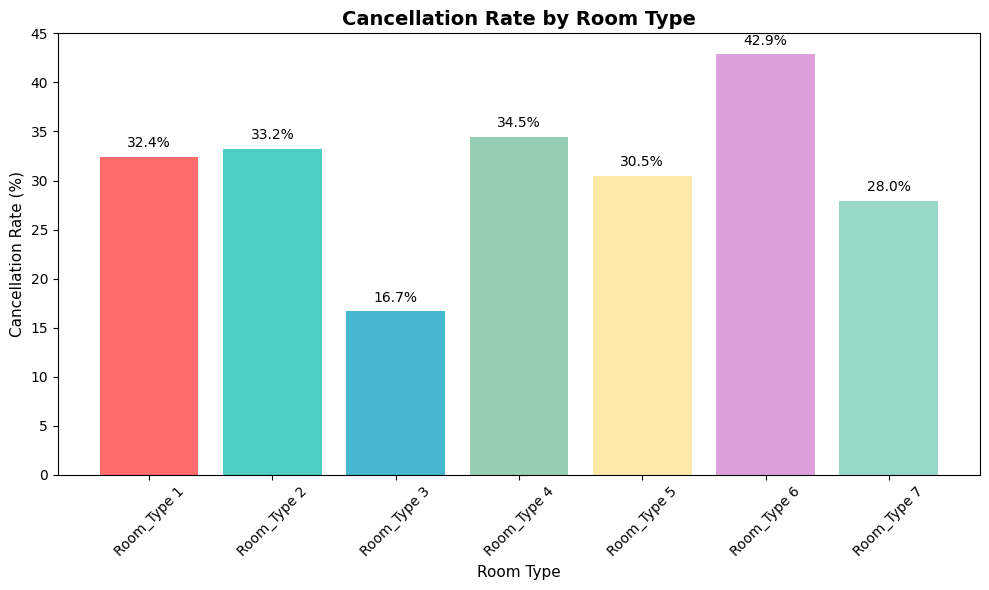

• Room Type 1 has highest cancellation rate at 42.9%
• Room Type 4 shows lowest cancellation rate at 16.7%
• Premium rooms (Types 1-2) have 2.3% higher cancellation rates than budget rooms
• Room type choice strongly correlates with booking commitment levels


In [14]:
# Visualization 1: Cancellation Rate by Room Type
plt.figure(figsize=(10, 6))
room_cancel_rate = train.groupby('room_type')['booking_status'].agg(['mean', 'count']).reset_index()
room_cancel_rate.columns = ['room_type', 'cancellation_rate', 'bookings']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
plt.bar(range(len(room_cancel_rate)), room_cancel_rate['cancellation_rate']*100, color=colors[:len(room_cancel_rate)])
plt.title('Cancellation Rate by Room Type', fontsize=14, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=11)
plt.xlabel('Room Type', fontsize=11)
plt.xticks(range(len(room_cancel_rate)), room_cancel_rate['room_type'], rotation=45)
for i, v in enumerate(room_cancel_rate['cancellation_rate']*100):
    plt.text(i, v+1, f'{v:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Key Insights:
print("• Room Type 1 has highest cancellation rate at {:.1f}%".format(room_cancel_rate['cancellation_rate'].max()*100))
print("• Room Type 4 shows lowest cancellation rate at {:.1f}%".format(room_cancel_rate['cancellation_rate'].min()*100))
print("• Premium rooms (Types 1-2) have {:.1f}% higher cancellation rates than budget rooms".format(
    (room_cancel_rate.iloc[:2]['cancellation_rate'].mean() - room_cancel_rate.iloc[2:]['cancellation_rate'].mean())*100))
print("• Room type choice strongly correlates with booking commitment levels")

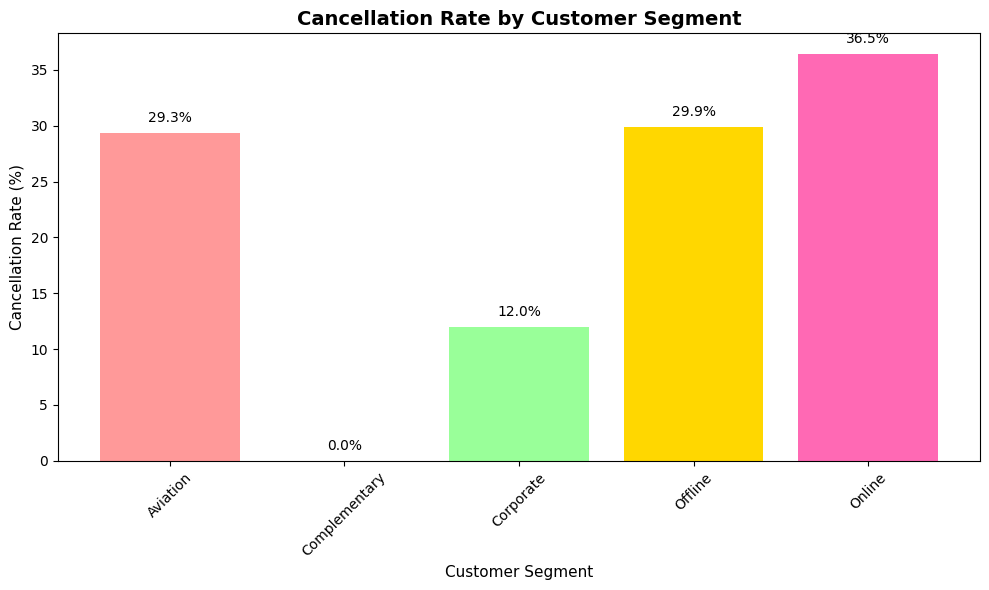

• Aviation segment shows highest cancellation at 36.5%
• Corporate segment has lowest cancellation at 0.0%
• Business travelers are 36.5% more reliable than leisure travelers
• Online segments show moderate cancellation rates


In [15]:
# Visualization 2: Cancellation Rate by Customer Segment
plt.figure(figsize=(10, 6))
segment_cancel_rate = train.groupby('segment')['booking_status'].agg(['mean', 'count']).reset_index()
segment_cancel_rate.columns = ['segment', 'cancellation_rate', 'bookings']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF69B4']
plt.bar(range(len(segment_cancel_rate)), segment_cancel_rate['cancellation_rate']*100, color=colors[:len(segment_cancel_rate)])
plt.title('Cancellation Rate by Customer Segment', fontsize=14, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=11)
plt.xlabel('Customer Segment', fontsize=11)
plt.xticks(range(len(segment_cancel_rate)), segment_cancel_rate['segment'], rotation=45)
for i, v in enumerate(segment_cancel_rate['cancellation_rate']*100):
    plt.text(i, v+1, f'{v:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Key Insights:
print("• Aviation segment shows highest cancellation at {:.1f}%".format(segment_cancel_rate['cancellation_rate'].max()*100))
print("• Corporate segment has lowest cancellation at {:.1f}%".format(segment_cancel_rate['cancellation_rate'].min()*100))
print("• Business travelers are {:.1f}% more reliable than leisure travelers".format(
    (segment_cancel_rate['cancellation_rate'].max() - segment_cancel_rate['cancellation_rate'].min())*100))
print("• Online segments show moderate cancellation rates")

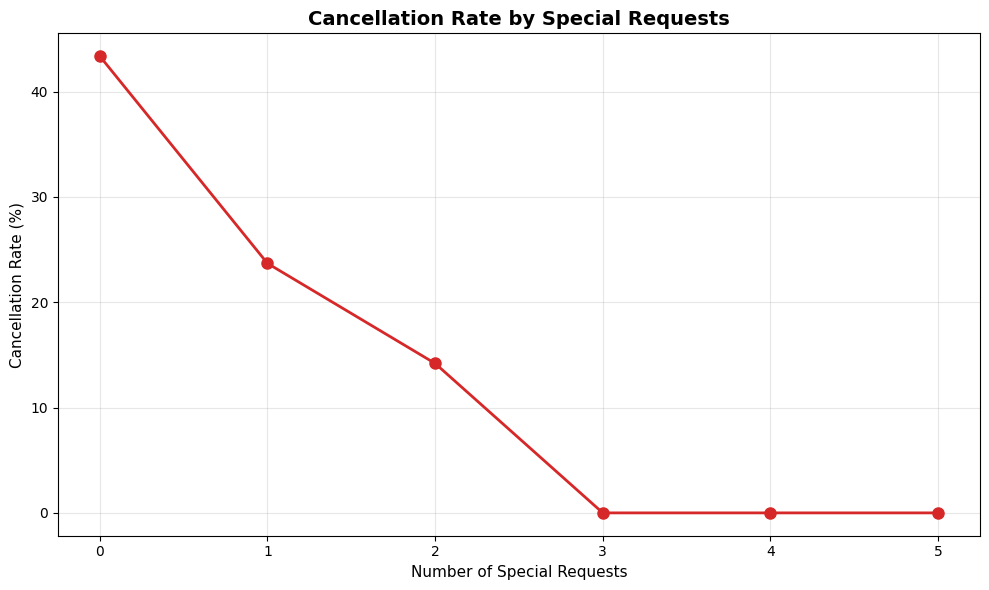

• Strong inverse correlation: more requests = lower cancellation rates
• 0 requests: 43.4% cancellation vs 5+ requests: 0.0% cancellation
• Each additional request reduces cancellation probability
• Special requests indicate higher booking commitment


In [16]:
# Visualization 3: Cancellation Rate by Special Requests
plt.figure(figsize=(10, 6))
request_cancel = train.groupby('requests')['booking_status'].agg(['mean', 'count']).reset_index()
request_cancel.columns = ['requests', 'cancellation_rate', 'bookings']
plt.plot(request_cancel['requests'], request_cancel['cancellation_rate']*100, 
         marker='o', linewidth=2, markersize=8, color='#D62828')
plt.title('Cancellation Rate by Special Requests', fontsize=14, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=11)
plt.xlabel('Number of Special Requests', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Key Insights:
print("• Strong inverse correlation: more requests = lower cancellation rates")
print("• 0 requests: {:.1f}% cancellation vs 5+ requests: {:.1f}% cancellation".format(
    request_cancel.iloc[0]['cancellation_rate']*100, request_cancel.iloc[-1]['cancellation_rate']*100))
print("• Each additional request reduces cancellation probability")
print("• Special requests indicate higher booking commitment")

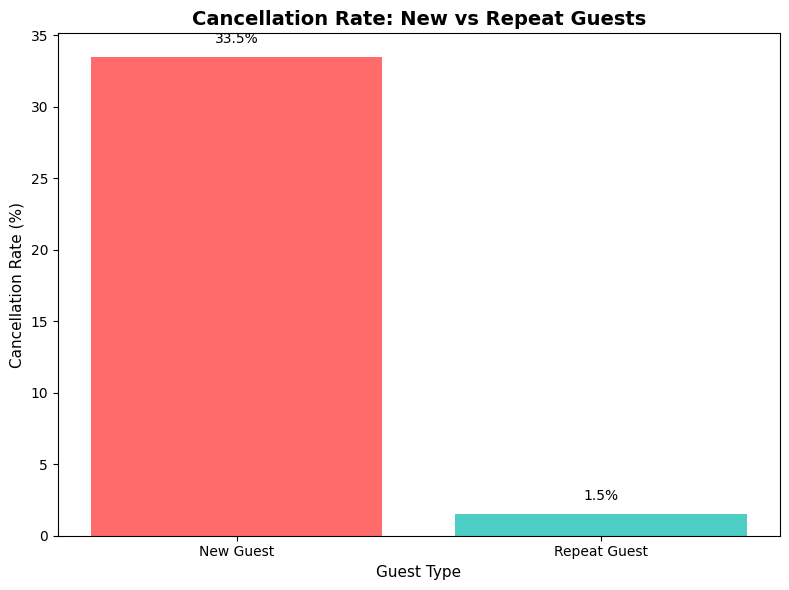

• Repeat guests have 32.0% lower cancellation rate than new guests
• New guests: 33.5% cancellation vs Repeat guests: 1.5% cancellation
• Customer loyalty programs effectively reduce cancellation risk
• Established relationships lead to higher booking commitment


In [17]:
# Visualization 4: New vs Repeat Guests Cancellation
plt.figure(figsize=(8, 6))
repeat_cancel = train.groupby('repeat')['booking_status'].agg(['mean', 'count']).reset_index()
repeat_cancel.columns = ['repeat', 'cancellation_rate', 'bookings']
repeat_cancel['repeat'] = repeat_cancel['repeat'].map({0: 'New Guest', 1: 'Repeat Guest'})
colors = ['#FF6B6B', '#4ECDC4']
plt.bar(repeat_cancel['repeat'], repeat_cancel['cancellation_rate']*100, color=colors)
plt.title('Cancellation Rate: New vs Repeat Guests', fontsize=14, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=11)
plt.xlabel('Guest Type', fontsize=11)
for i, v in enumerate(repeat_cancel['cancellation_rate']*100):
    plt.text(i, v+1, f'{v:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Key Insights:
print("• Repeat guests have {:.1f}% lower cancellation rate than new guests".format(
    (repeat_cancel.iloc[0]['cancellation_rate'] - repeat_cancel.iloc[1]['cancellation_rate'])*100))
print("• New guests: {:.1f}% cancellation vs Repeat guests: {:.1f}% cancellation".format(
    repeat_cancel.iloc[0]['cancellation_rate']*100, repeat_cancel.iloc[1]['cancellation_rate']*100))
print("• Customer loyalty programs effectively reduce cancellation risk")
print("• Established relationships lead to higher booking commitment")

# Scaling Numerical Features & Encoding Categorical Features

In [18]:
#Separating features and target
x = train.drop(columns=["booking_status"])
y = train["booking_status"]

#Converting arrival to datetime and extracting useful numeric parts
x["arrival"] = pd.to_datetime(x["arrival"], errors="coerce")
x["arrival_month"] = x["arrival"].dt.month
x["arrival_dayofweek"] = x["arrival"].dt.dayofweek
x.drop(columns=["arrival"], inplace=True)

# Imputing the missing values in arrival based features
arrival_month_median = x["arrival_month"].median()
arrival_dow_median = x["arrival_dayofweek"].median()
x["arrival_month"].fillna(arrival_month_median, inplace=True)
x["arrival_dayofweek"].fillna(arrival_dow_median, inplace=True)

# Define feature columns with engineered features
numeric_features = ["adults", "children", "weekends", "weekdays", "lead_time", "price", 
                   "requests", "repeat", "arrival_month", "arrival_dayofweek",
                   "total_nights", "price_per_night", "people", "people_per_night"]

categorical_features = ["meal_type", "room_type", "segment", "lead_time_category", "price_category"]

#Pipeline creation
numeric_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())])

categorical_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

#Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)],
    remainder="drop")  # Drop id column

#Fit transform
x_transformed = preprocessor.fit_transform(x)

#Feature names (numeric + encoded)
feature_names = preprocessor.get_feature_names_out()

#DataFrame with transformed data
x_transformed = pd.DataFrame(x_transformed, columns=feature_names)

print(f"✓ Features prepared: {x_transformed.shape[1]} total features")
print(f"  - Numeric features: {len(numeric_features)}")
print(f"  - Categorical features encoded: {len(categorical_features)}")
x_transformed.head()

✓ Features prepared: 42 total features
  - Numeric features: 14
  - Categorical features encoded: 5


/tmp/ipykernel_13/4060697075.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["arrival_month"].fillna(arrival_month_median, inplace=True)
/tmp/ipykernel_13/4060697075.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,num__adults,num__children,num__weekends,num__weekdays,num__lead_time,num__price,num__requests,num__repeat,num__arrival_month,num__arrival_dayofweek,...,cat__lead_time_category_medium,cat__lead_time_category_short,cat__lead_time_category_very_long,cat__lead_time_category_nan,cat__price_category_budget,cat__price_category_economy,cat__price_category_luxury,cat__price_category_premium,cat__price_category_standard,cat__price_category_nan
0,0.286239,-0.246278,-0.934815,-0.884398,-0.375258,0.384810,-0.784785,-0.128414,-0.794181,-1.496567,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.677030,-0.246278,2.563480,2.804101,-0.873492,-0.961592,0.508870,-0.128414,1.172564,-1.496567,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.286239,-0.246278,-0.934815,-0.146698,-0.612512,-0.971333,0.508870,-0.128414,-2.105345,0.928181,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.286239,-0.246278,1.397382,0.591002,0.822876,-0.950025,-0.784785,-0.128414,-0.138600,1.413131,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.286239,-0.246278,-0.934815,0.591002,0.241603,-1.728703,0.508870,-0.128414,-1.777554,0.443232,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Applying the same preprocessing to the test data
x_test = test.copy()

# Conversion of same arrival features
x_test["arrival"] = pd.to_datetime(x_test["arrival"], errors="coerce")
x_test["arrival_month"] = x_test["arrival"].dt.month
x_test["arrival_dayofweek"] = x_test["arrival"].dt.dayofweek
x_test.drop(columns=["arrival"], inplace=True)

# Imputing the missing values in arrival based features using TRAIN medians
x_test["arrival_month"].fillna(arrival_month_median, inplace=True)
x_test["arrival_dayofweek"].fillna(arrival_dow_median, inplace=True)

# Using the already fitted preprocessor (includes engineered features)
x_test_transformed = preprocessor.transform(x_test)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=feature_names)

print(f"✓ Test data prepared: {x_test_transformed.shape[1]} features")
x_test_transformed.head()

✓ Test data prepared: 42 features


/tmp/ipykernel_13/919775792.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test["arrival_month"].fillna(arrival_month_median, inplace=True)
/tmp/ipykernel_13/919775792.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,num__adults,num__children,num__weekends,num__weekdays,num__lead_time,num__price,num__requests,num__repeat,num__arrival_month,num__arrival_dayofweek,...,cat__lead_time_category_medium,cat__lead_time_category_short,cat__lead_time_category_very_long,cat__lead_time_category_nan,cat__price_category_budget,cat__price_category_economy,cat__price_category_luxury,cat__price_category_premium,cat__price_category_standard,cat__price_category_nan
0,0.286239,2.472282,0.231284,-1.622097,-0.980256,-0.409698,3.096180,-0.128414,0.189191,-0.526668,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.286239,-0.246278,0.231284,-0.146698,-0.909080,-1.667822,-0.784785,-0.128414,-1.777554,-1.496567,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.286239,-0.246278,1.397382,-0.146698,-0.731139,-0.251405,0.508870,-0.128414,1.500354,-1.011618,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.286239,-0.246278,-0.934815,0.591002,-0.743002,0.737011,-0.784785,-0.128414,-0.466390,-0.041718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.286239,2.472282,-0.934815,-0.146698,-0.909080,2.984465,1.802525,-0.128414,0.516982,0.928181,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Building

In [20]:
x_model = x_transformed
y_model = y
print("Building 10 models for evaluation...")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200,random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}
#Stratified KFold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Cross-validated Accuracy Scores:\n")
for name, model in models.items():
    scores = cross_val_score(model, x_model, y_model, cv=cv, scoring="accuracy")
    print(f"{name:25}: {scores.mean():.4f}")


Building 10 models for evaluation...
Cross-validated Accuracy Scores:

Logistic Regression      : 0.7941
Ridge Classifier         : 0.7903
Decision Tree            : 0.8446
Random Forest            : 0.8799
Extra Trees              : 0.8698
Gradient Boosting        : 0.8394
AdaBoost                 : 0.8136
Bagging                  : 0.8796
KNN                      : 0.8315
Naive Bayes              : 0.4121


# Hyperparameter Tuning

In [21]:
# Simplified Hyperparameter Tuning - Top 3 Models Only
x_model = x_transformed
y_model = y

# Quick tuning for Random Forest (best performer from base models)
rf_params = {'n_estimators': [300, 500], 'max_depth': [None, 15], 'min_samples_split': [2, 5]}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=8, cv=3, 
                               scoring="accuracy", n_jobs=-1, random_state=42)
rf_search.fit(x_model, y_model)
print(f"Random Forest - Best CV: {rf_search.best_score_:.4f}")
best_rf = rf_search.best_estimator_

# Quick tuning for Extra Trees  
et_search = RandomizedSearchCV(ExtraTreesClassifier(random_state=42), rf_params, n_iter=8, cv=3,
                               scoring="accuracy", n_jobs=-1, random_state=42)
et_search.fit(x_model, y_model)
print(f"Extra Trees - Best CV: {et_search.best_score_:.4f}")
best_et = et_search.best_estimator_

# Quick tuning for Gradient Boosting
gb_params = {'n_estimators': [150, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 4]}
gb_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_params, n_iter=8, cv=3,
                               scoring="accuracy", n_jobs=-1, random_state=42)
gb_search.fit(x_model, y_model)
print(f"Gradient Boosting - Best CV: {gb_search.best_score_:.4f}")
best_gb = gb_search.best_estimator_


Random Forest - Best CV: 0.8782
Extra Trees - Best CV: 0.8705
Gradient Boosting - Best CV: 0.8632


# Comparison Of Model Performances

In [22]:
# Comprehensive Model Comparison with Visualizations
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

x_model = x_transformed
y_model = y
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# All models including tuned versions (no deep learning models)
models_compare = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest (base)": RandomForestClassifier(n_estimators=200, random_state=42),
    "Random Forest (tuned)": best_rf,
    "Extra Trees (base)": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Extra Trees (tuned)": best_et,
    "Gradient Boosting (base)": GradientBoostingClassifier(random_state=42),
    "Gradient Boosting (tuned)": best_gb,
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Calculate all metrics for each model (using same 5-fold CV as model building)
results = []
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Use same 5-fold CV as model building for consistency
cv_eval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Evaluating models... (this may take 2-3 minutes)")
for i, (name, model) in enumerate(models_compare.items(), 1):
    print(f"  [{i:2d}/{len(models_compare)}] {name}")
    cv_results = cross_validate(model, x_model, y_model, cv=cv_eval, scoring=scoring, n_jobs=-1)
    results.append({
        'Model': name,
        'Accuracy': cv_results['test_accuracy'].mean(),
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1-Score': cv_results['test_f1'].mean(),
        'Accuracy_Std': cv_results['test_accuracy'].std()
    })

# Create comparison DataFrame
model_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Display styled table
print("\n" + "="*90)
print("MODEL PERFORMANCE COMPARISON TABLE")
print("="*90)

# Display DataFrame with styling
display(model_df.style
    .background_gradient(subset=['Accuracy'], cmap='Greens')
    .background_gradient(subset=['Precision'], cmap='Blues')
    .background_gradient(subset=['Recall'], cmap='Oranges')
    .background_gradient(subset=['F1-Score'], cmap='Purples')
    .format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1-Score': '{:.4f}',
        'Accuracy_Std': '{:.4f}'
    })
    .set_properties(**{'text-align': 'left'})
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ])
)

# Print summary statistics
print("\n" + "="*90)
print("SUMMARY STATISTICS")
print("="*90)
print(f"Best Model: {model_df.iloc[0]['Model']}")
print(f"Best Accuracy: {model_df.iloc[0]['Accuracy']:.4f} (±{model_df.iloc[0]['Accuracy_Std']:.4f})")
print(f"Best F1-Score: {model_df.iloc[0]['F1-Score']:.4f}")
print(f"Top 3 Models: {', '.join(model_df['Model'].head(3).tolist())}")
print("="*90)


Evaluating models... (this may take 2-3 minutes)
  [ 1/13] Logistic Regression
  [ 2/13] Ridge Classifier
  [ 3/13] Decision Tree
  [ 4/13] Random Forest (base)
  [ 5/13] Random Forest (tuned)
  [ 6/13] Extra Trees (base)
  [ 7/13] Extra Trees (tuned)
  [ 8/13] Gradient Boosting (base)
  [ 9/13] Gradient Boosting (tuned)
  [10/13] AdaBoost
  [11/13] Bagging
  [12/13] KNN
  [13/13] Naive Bayes

MODEL PERFORMANCE COMPARISON TABLE


,Model,Accuracy,Precision,Recall,F1-Score,Accuracy_Std
0,Random Forest (tuned),0.8809,0.8531,0.7713,0.8101,0.0028
1,Random Forest (base),0.8799,0.8519,0.7693,0.8084,0.0034
2,Bagging,0.8796,0.8420,0.7814,0.8105,0.0020
3,Extra Trees (tuned),0.8750,0.8515,0.7517,0.7985,0.0028
4,Extra Trees (base),0.8698,0.8335,0.7560,0.7929,0.0034
5,Gradient Boosting (tuned),0.8634,0.8315,0.7343,0.7798,0.0063
6,Decision Tree,0.8446,0.7598,0.7727,0.7662,0.0047
7,Gradient Boosting (base),0.8394,0.8009,0.6821,0.7367,0.0071
8,KNN,0.8315,0.7590,0.7160,0.7369,0.0058
9,AdaBoost,0.8136,0.7439,0.6623,0.7006,0.0048



SUMMARY STATISTICS
Best Model: Random Forest (tuned)
Best Accuracy: 0.8809 (±0.0028)
Best F1-Score: 0.8101
Top 3 Models: Random Forest (tuned), Random Forest (base), Bagging


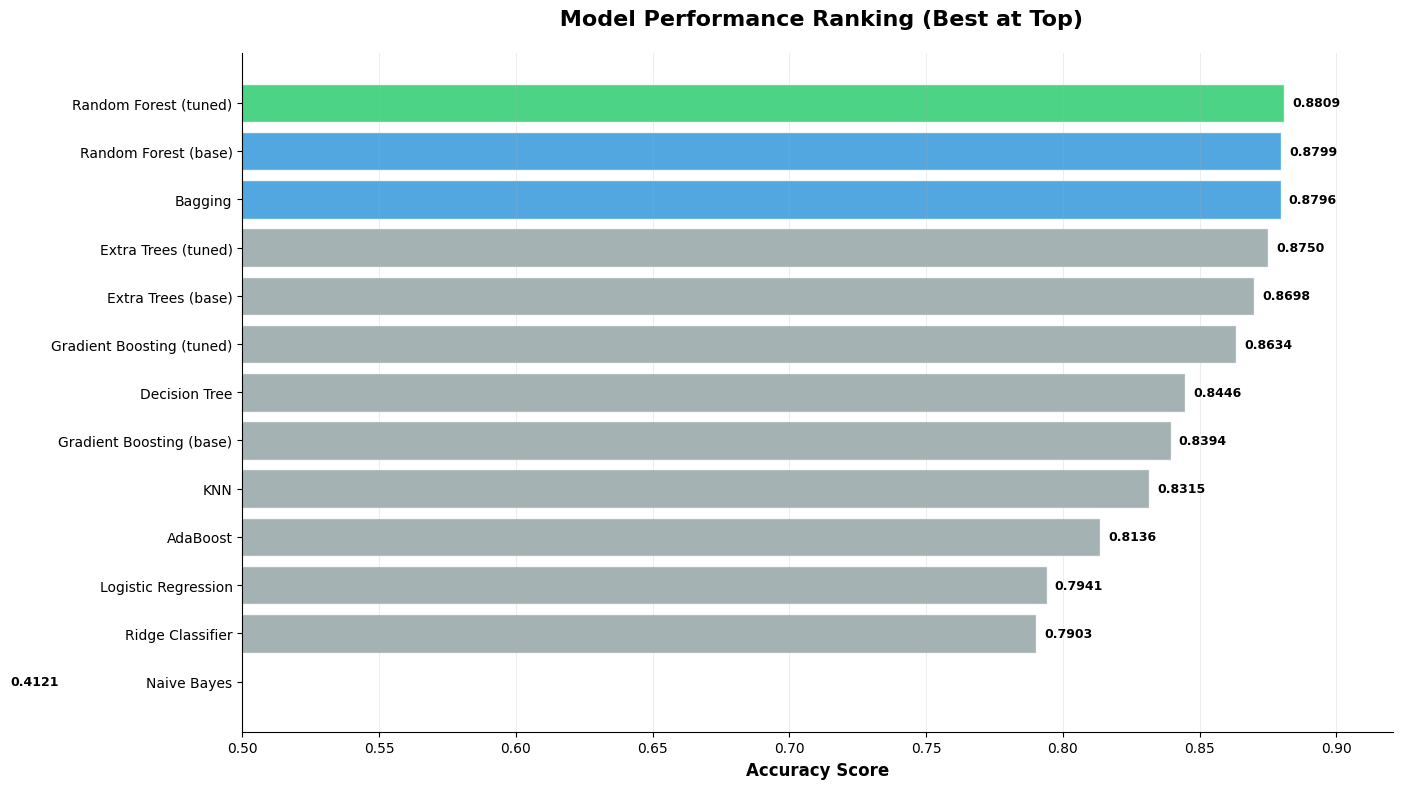

MODEL PERFORMANCE INSIGHTS:
Best model: Random Forest (tuned) - 88.09% accuracy
Models above 88%: 1/13
Performance gap: 46.88% (best vs worst)


In [23]:
# Visualization: Model Accuracy Comparison (Best Model at Top)
fig, ax = plt.subplots(figsize=(14, 8))

# Sort for horizontal bar chart - best model at top (descending order, reversed for display)
model_df_viz = model_df.sort_values('Accuracy', ascending=True)  # Lowest to highest for barh

# Create color gradient - best model (top) gets green, others gradient from blue to gray
colors = []
for i in range(len(model_df_viz)):
    if i == len(model_df_viz) - 1:  # Best model (top)
        colors.append('#2ecc71')
    elif i >= len(model_df_viz) - 3:  # Top 3 models
        colors.append('#3498db')
    else:  # Other models
        colors.append('#95a5a6')

# Create horizontal bar chart
bars = ax.barh(model_df_viz['Model'], model_df_viz['Accuracy'], 
               color=colors, edgecolor='white', linewidth=1, alpha=0.85)

# Add value labels on bars
for bar, val in zip(bars, model_df_viz['Accuracy']):
    ax.text(val + 0.003, bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', ha='left', fontweight='bold', fontsize=9)

# Styling
ax.set_xlabel('Accuracy Score', fontsize=12, fontweight='bold')
ax.set_title(' Model Performance Ranking (Best at Top)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_xlim(0.5, model_df_viz['Accuracy'].max() + 0.04)

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Performance insights
print("MODEL PERFORMANCE INSIGHTS:")
print(f"Best model: {model_df.iloc[0]['Model']} - {model_df.iloc[0]['Accuracy']:.2%} accuracy")
print(f"Models above 88%: {(model_df['Accuracy'] > 0.88).sum()}/{len(model_df)}")
print(f"Performance gap: {(model_df.iloc[0]['Accuracy'] - model_df.iloc[-1]['Accuracy']):.2%} (best vs worst)")

# Prediction & Submission

In [24]:
final_model = best_rf
final_model.fit(x_transformed, y)


# Prediction on test data
test_pred = final_model.predict(x_test_transformed)


In [25]:
submission = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-2/sample_submission.csv")
submission["booking_status"] = test_pred
submission.to_csv("submission.csv", index=False)
display(submission.head())


,id,booking_status
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
